Submission ini bertujuan untuk menentukan genre film berdasarkan synopsis

Dataset : [dataset](https://www.kaggle.com/datasets/lokkagle/movie-genre-data?rvi=1)

Nama : Celvine

Dicoding Submission 1 NLP

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import nltk
import time

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from imblearn.over_sampling import SMOTE

In [2]:
if not os.path.isfile("dataset.csv"):
  print("Downloading dataset.....")
  !wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RVt9sLxyM1HZ_raMyzmL0jVUzk9wUuoO' -O dataset.csv
  nltk.download('stopwords')

--2024-01-11 01:50:27--  https://docs.google.com/uc?export=download&id=1RVt9sLxyM1HZ_raMyzmL0jVUzk9wUuoO
Resolving docs.google.com (docs.google.com)... 142.250.101.138, 142.250.101.139, 142.250.101.100, ...
Connecting to docs.google.com (docs.google.com)|142.250.101.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1RVt9sLxyM1HZ_raMyzmL0jVUzk9wUuoO&export=download [following]
--2024-01-11 01:50:27--  https://drive.usercontent.google.com/download?id=1RVt9sLxyM1HZ_raMyzmL0jVUzk9wUuoO&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.2.132, 2607:f8b0:4023:c0b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22936196 (22M) [application/octet-stream]
Saving to: ‘dataset.csv’

dataset.csv         100%[===================>]  21.87M  38.8MB/s    in

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
dataset = pd.read_csv("dataset.csv")
dataset = dataset.drop(columns=['id'])
dataset.rename(columns={"text": "synopsis"}, inplace=True)
dataset.head()

,synopsis,genre
0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,"t, summa cum laude and all. And I'm about to l...",comedy
2,"up Come, I have a surprise.... She takes him ...",drama
3,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,"nd dismounts, just as the other children reach...",drama


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22579 entries, 0 to 22578
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   synopsis  22579 non-null  object
 1   genre     22579 non-null  object
dtypes: object(2)
memory usage: 352.9+ KB


In [ ]:
dataset.isnull().values.any()

False

In [ ]:
dataset['genre'].value_counts()

drama        8873
thriller     6824
comedy       2941
action       2392
sci-fi        613
horror        456
other         270
adventure     147
romance        63
Name: genre, dtype: int64

In [ ]:
thriller_df = dataset[dataset['genre'] == 'thriller']
thriller_df = thriller_df[:2350]

In [ ]:
dataset = dataset[~dataset['genre'].isin(['sci-fi', 'horror', 'other', 'adventure', 'romance', 'drama', 'thriller'])]

In [ ]:
dataset = dataset.append(thriller_df, ignore_index=True)

<ipython-input-214-c8778f930105>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = dataset.append(thriller_df, ignore_index=True)


In [ ]:
genre = pd.get_dummies(dataset.genre)
new_dataset = pd.concat([dataset, genre], axis = 1)

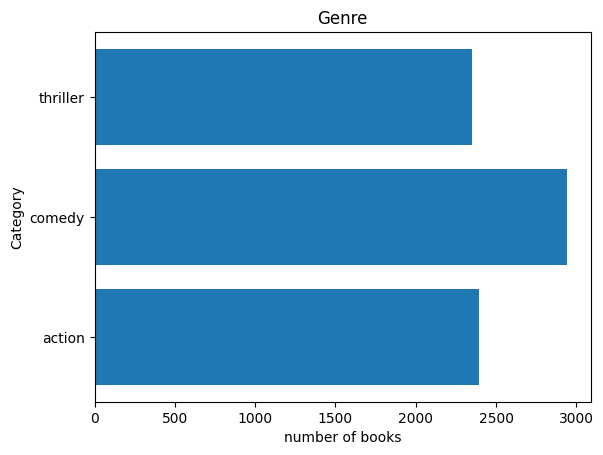

In [ ]:
genre_values = {}
for i_label in genre:
  genre_values[i_label] = new_dataset.groupby(i_label)[i_label].count()[1]


plt.barh(list(genre), [genre_values[genre] for genre in genre])
plt.title("Genre")
plt.xlabel("number of books")
plt.ylabel("Category")
plt.show()

In [ ]:
useless_words = nltk.corpus.stopwords.words("english")

text_clean = []
for sentence in dataset['synopsis']:
  text_filtered = [word for word in sentence.split() if not word in useless_words]
  text_clean.append(" ".join(text_filtered))

new_dataset['synopsis'] = text_clean

new_dataset['synopsis'] = new_dataset['synopsis'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))
new_dataset['synopsis'] = new_dataset['synopsis'].map(lambda x: re.sub(r'\W+', ' ', x))
new_dataset['synopsis'] = new_dataset['synopsis'].map(lambda x: x.lower())

new_dataset.head(10)

,synopsis,genre,action,comedy,thriller
0,t summa cum laude all and im launch brand new ...,comedy,0,1,0
1,e reels world spins sweat pours pressure build...,action,1,0,0
2,i say hes man wholl go far some people say hes...,comedy,0,1,0
3,find bachelor party is cole yes i did mr t fin...,comedy,0,1,0
4,ibly horrendous public break quad again camero...,comedy,0,1,0
5,r back bill starla get hell here starla takes ...,comedy,0,1,0
6,enter house int brownstone day continuous acti...,action,1,0,0
7,scotty 52a striding vast cargo area bones foll...,comedy,0,1,0
8,odd dont touch me todd you touched me you touc...,comedy,0,1,0
9,hat happened vivian stuckey he wants appointme...,comedy,0,1,0


In [ ]:
summary = new_dataset['synopsis'].values
label = new_dataset[list(genre)].values

In [ ]:
data_latih, data_test, label_latih, label_test = train_test_split(summary, label, test_size=0.2, random_state=4)

In [ ]:
tokenizer = Tokenizer(num_words= 5000, oov_token='x')
tokenizer.fit_on_texts(data_latih)
# tokenizer.fit_on_texts(data_test)

sekuens_latih = tokenizer.texts_to_sequences(data_latih)
sekuens_test = tokenizer.texts_to_sequences(data_test)

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)

In [ ]:
# sm = SMOTE(random_state = 42)

# padded_latih_sm, label_latih_sm = sm.fit_resample(padded_latih, label_latih)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    # tf.keras.layers.Dense(64, activation='relu'),
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])


opt = tf.keras.optimizers.Adam(learning_rate=0.00145)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, None, 16)          80000     
                                                                 
 lstm_9 (LSTM)               (None, 128)               74240     
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_22 (Dense)            (None, 3)                 387       
                                                                 
Total params: 171139 (668.51 KB)
Trainable params: 171139 (668.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
class s1Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.90):
      print("Akurasi telah mencapai > 95%!")
      self.model.stop_training = True

In [ ]:
num_epochs = 50
start_time = time.time()

history = model.fit(padded_latih, label_latih, epochs = num_epochs, batch_size = 32, validation_data=(padded_test, label_test), callbacks=[s1Callback()], verbose = 2)

end_time = time.time()

execution_time = (end_time - start_time) / 60

print(f"Execution time: {execution_time:.2f} minutes")

Epoch 1/50
193/193 - 15s - loss: 0.9932 - accuracy: 0.4707 - val_loss: 0.6885 - val_accuracy: 0.6610 - 15s/epoch - 78ms/step
Epoch 2/50
193/193 - 5s - loss: 0.5321 - accuracy: 0.7654 - val_loss: 0.6416 - val_accuracy: 0.6975 - 5s/epoch - 24ms/step
Epoch 3/50
193/193 - 4s - loss: 0.3122 - accuracy: 0.8814 - val_loss: 0.3606 - val_accuracy: 0.8705 - 4s/epoch - 18ms/step
Epoch 4/50
193/193 - 2s - loss: 0.1564 - accuracy: 0.9509 - val_loss: 0.3192 - val_accuracy: 0.8907 - 2s/epoch - 12ms/step
Epoch 5/50
193/193 - 2s - loss: 0.0651 - accuracy: 0.9828 - val_loss: 0.4761 - val_accuracy: 0.8686 - 2s/epoch - 13ms/step
Epoch 6/50
193/193 - 2s - loss: 0.0435 - accuracy: 0.9884 - val_loss: 0.4842 - val_accuracy: 0.8738 - 2s/epoch - 13ms/step
Epoch 7/50
193/193 - 2s - loss: 0.0394 - accuracy: 0.9889 - val_loss: 0.4806 - val_accuracy: 0.8412 - 2s/epoch - 12ms/step
Epoch 8/50
Akurasi telah mencapai > 95%!
193/193 - 3s - loss: 0.0296 - accuracy: 0.9927 - val_loss: 0.4341 - val_accuracy: 0.9063 - 3s/ep

In [ ]:
scores = model.evaluate(padded_test, label_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 90.63%


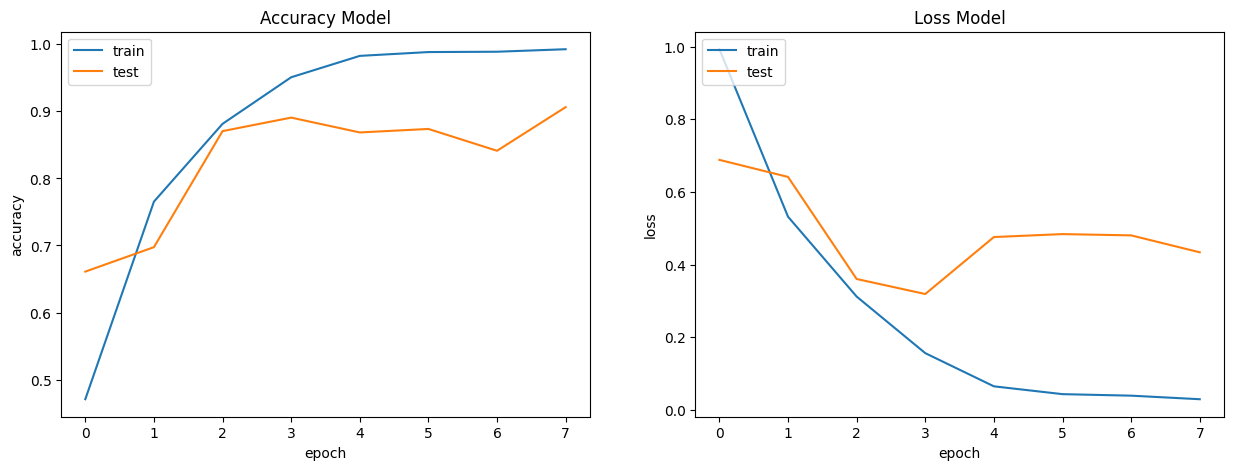

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')